In [1]:
#https://docs.dask.org/en/latest/use-cases.html

In [1]:
import dask.dataframe as dd
from dask import compute, delayed
from dask import visualize
from glob import glob
import os
import pandas as pd

In [35]:
def process(filename):
    df = pd.read_csv(filename)
    tt = df.total_amount.sum()
    return tt

In [36]:
csv_file = 'yellow_tripdata_2017-01.csv'
csv_file_on = 'yellow_tripdata_2017-01'

In [2]:
files = glob('./data/yellow_tripdata_2017-*')

In [3]:
files = files[:5]

In [39]:
files

['./data\\yellow_tripdata_2017-01_00.csv',
 './data\\yellow_tripdata_2017-01_01.csv',
 './data\\yellow_tripdata_2017-01_02.csv',
 './data\\yellow_tripdata_2017-01_03.csv',
 './data\\yellow_tripdata_2017-01_04.csv']

In [40]:
values = [delayed(process)(x) for x in files]

In [28]:
import dask.multiprocessing
results = compute(*values, scheduler='processes')

In [29]:
results

(5038638.739999999,
 4229581.420000001,
 4504899.050000001,
 4458857.45,
 4495569.490000001)

In [30]:
type(results)

tuple

In [41]:
from dask.distributed import Client
# client = Client("cluster-address:8786")
client = Client()
results = compute(*values, scheduler='distributed')

c:\programdata\psc_env\lib\site-packages\distributed\bokeh\core.py:57: UserWarning: 
Failed to start diagnostics server on port 8787. [WinError 10048] 각 소켓 주소(프로토콜/네트워크 주소/포트)는 하나만 사용할 수 있습니다
  warnings.warn('\n' + msg)


In [42]:
visualize(results)

In [4]:
import pandas as pd
from dask.delayed import delayed

filenames = files
dfs = [delayed(pd.read_csv)(fn) for fn in filenames]

df = dd.from_delayed(dfs) # df is a dask dataframe

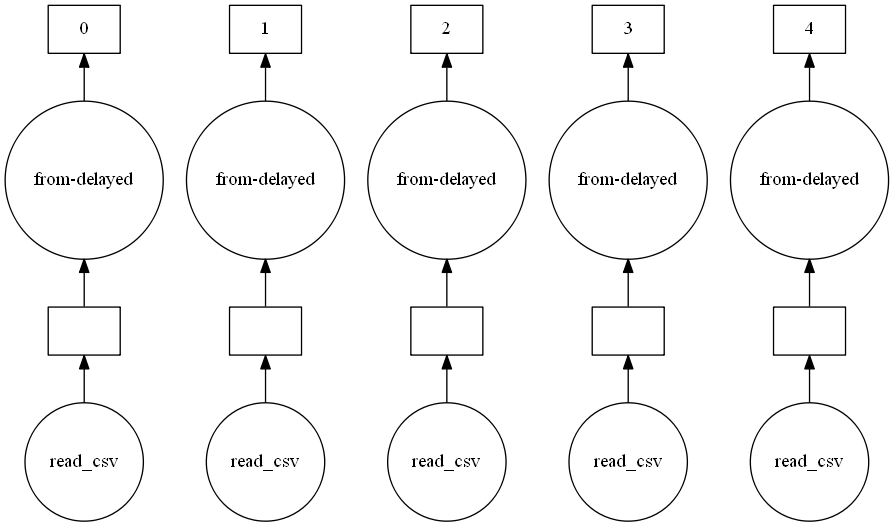

In [5]:
visualize(df)